# Chapter 3 - Classification with k-nearest neighbors

## Exercise 1

In [1]:
# import libraries from 3.2
# install.packages("mlr", dependencies = TRUE)
# library(mlr)
install.packages("mclust")
library(tidyverse)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Listing 3.1 (test library functions)
data(diabetes, package="mclust")
diabetesTib <- as_tibble(diabetes)

summary(diabetesTib)
diabetesTib

      class       glucose       insulin            sspg      
 Chemical:36   Min.   : 70   Min.   :  45.0   Min.   : 10.0  
 Normal  :76   1st Qu.: 90   1st Qu.: 352.0   1st Qu.:118.0  
 Overt   :33   Median : 97   Median : 403.0   Median :156.0  
               Mean   :122   Mean   : 540.8   Mean   :186.1  
               3rd Qu.:112   3rd Qu.: 558.0   3rd Qu.:221.0  
               Max.   :353   Max.   :1568.0   Max.   :748.0  

class,glucose,insulin,sspg
<fct>,<dbl>,<dbl>,<dbl>
Normal,80,356,124
Normal,97,289,117
Normal,105,319,143
Normal,90,356,199
Normal,90,323,240
Normal,86,381,157
Normal,100,350,221
Normal,85,301,186
Normal,97,379,142


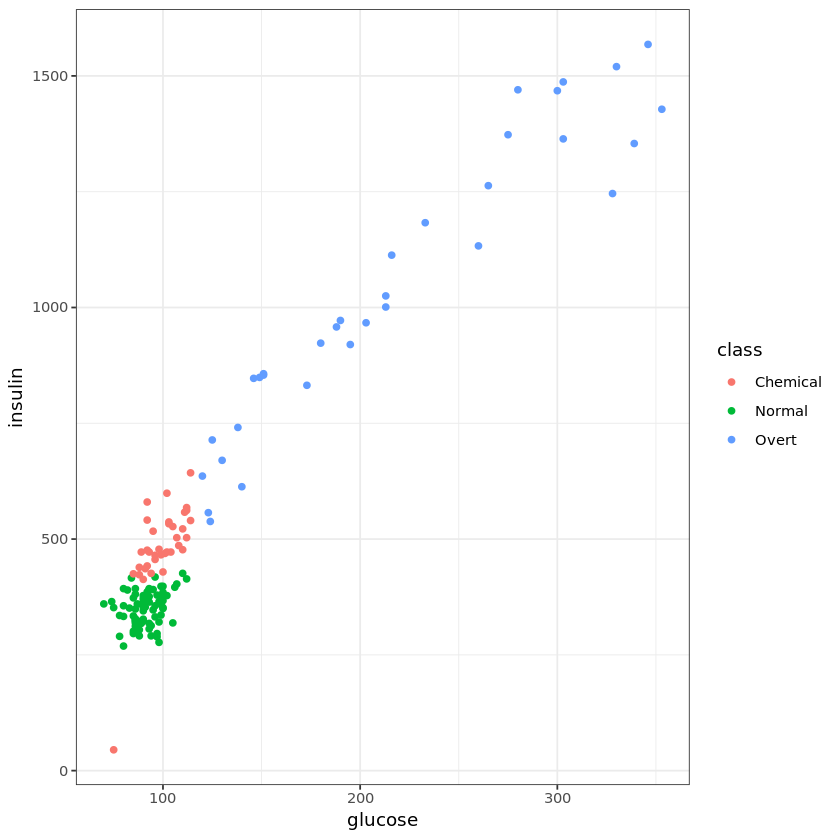

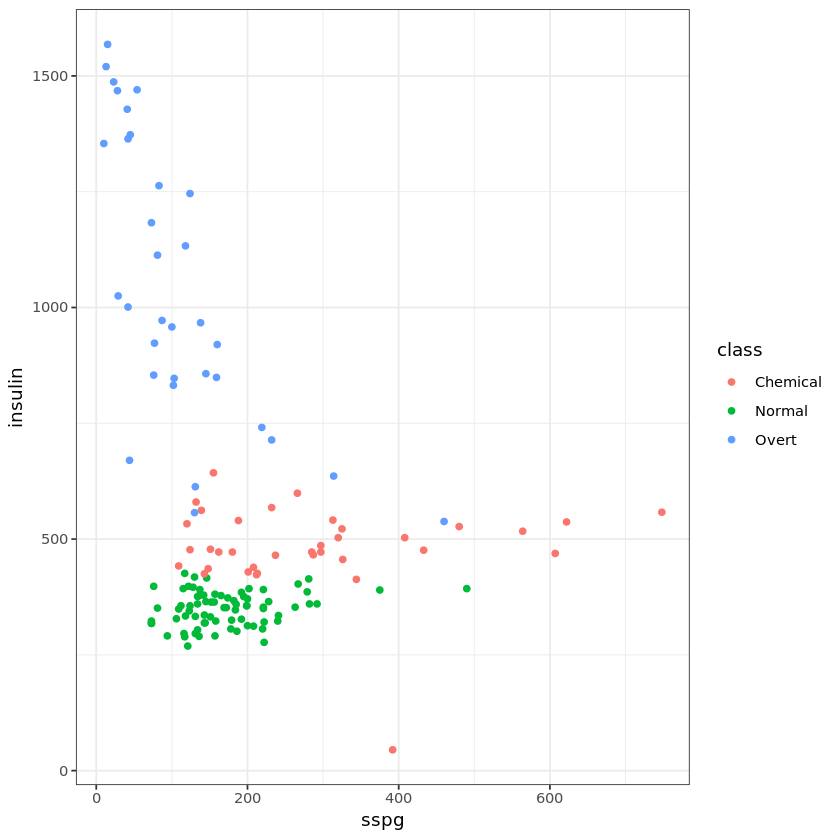

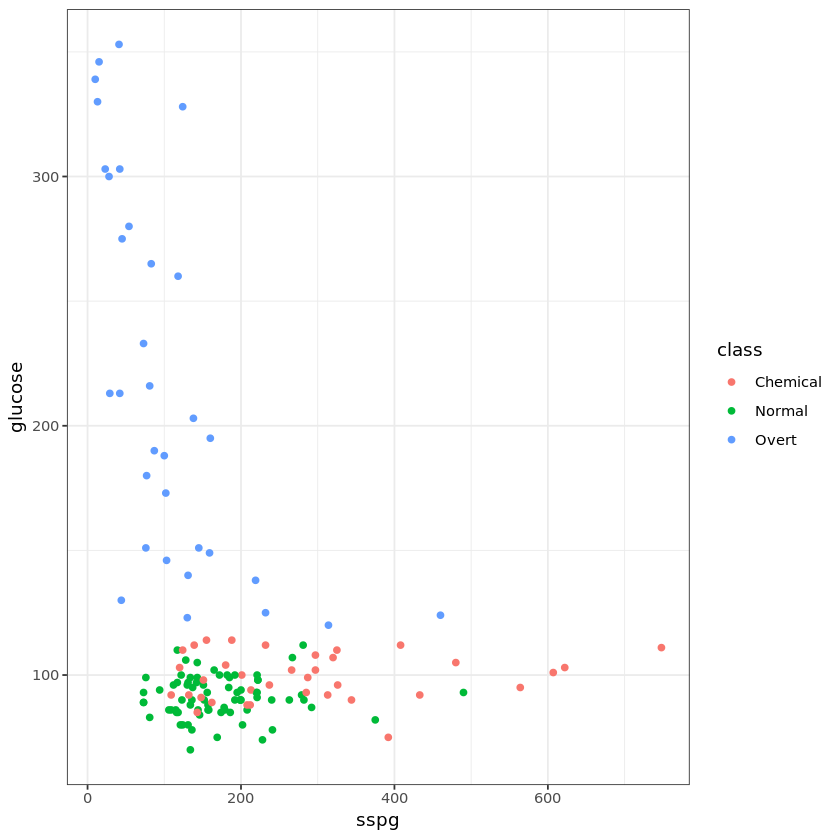

In [3]:
# Listing 3.2
ggplot(diabetesTib, aes(glucose, insulin, col = class)) + 
    geom_point() +
    theme_bw()

ggplot(diabetesTib, aes(sspg, insulin, col = class)) +
    geom_point() +
    theme_bw()

ggplot(diabetesTib, aes(sspg, glucose, col = class)) +
    geom_point() +
    theme_bw()

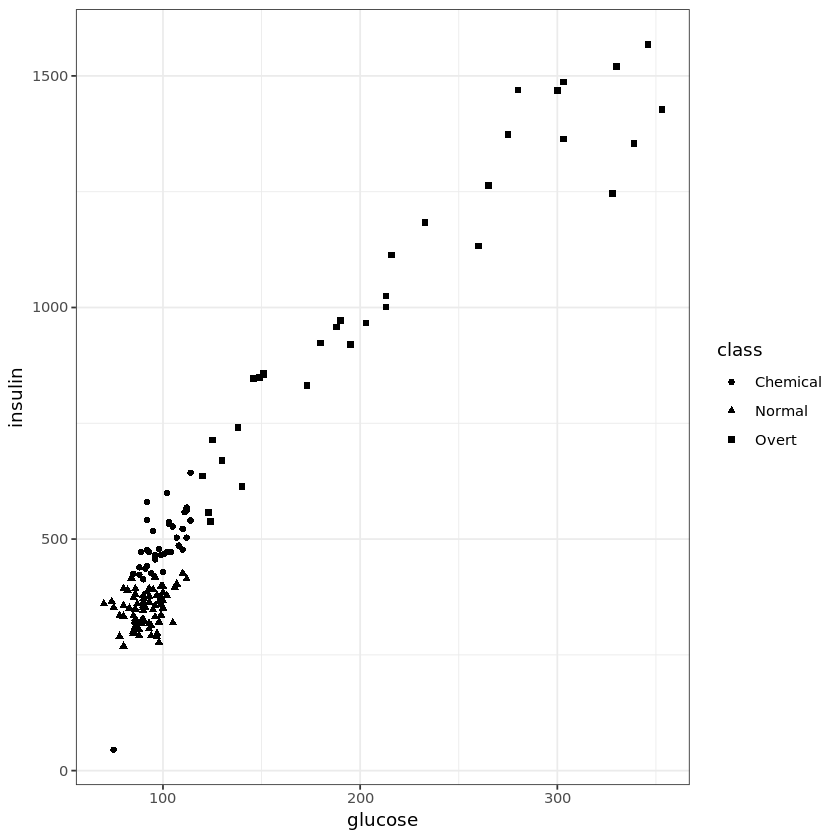

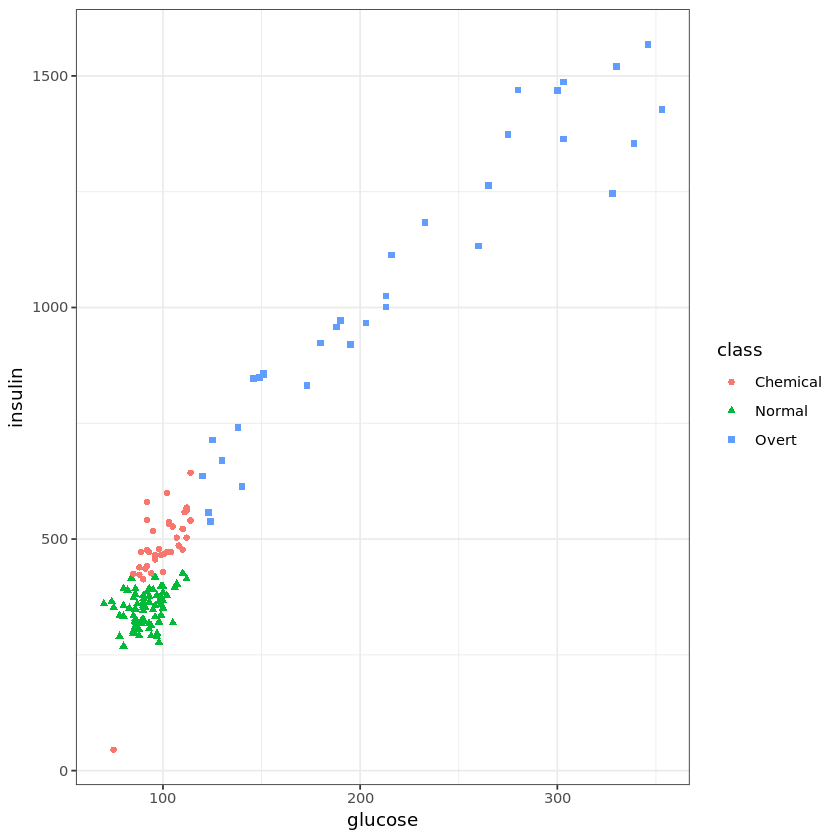

In [4]:
# Exercise 1
ggplot(diabetesTib, aes(glucose, insulin, shape = class)) + 
    geom_point() +
    theme_bw()

ggplot(diabetesTib, aes(glucose, insulin, col = class, shape = class)) + 
    geom_point() +
    theme_bw()